In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al


en = cptac.Endometrial()

In [2]:
proteomics_data = en.get_proteomics()
proteomics_data = proteomics_data[:95]

In [3]:
proteins = list(proteomics_data.columns)

In [4]:
sd_dict = {}
for protein in proteins:
    sd = np.std(proteomics_data[protein])
    sd_dict[protein] = sd
    
sd_dict

{'A1BG': 0.5756703080150949,
 'A2M': 0.7203734502819297,
 'A2ML1': 1.2621406003343445,
 'A4GALT': 0.7406839770945719,
 'AAAS': 0.24810705471850006,
 'AACS': 0.5468104858444168,
 'AADAT': 0.6300715494567872,
 'AAED1': 0.4653897262368141,
 'AAGAB': 0.3593755905953032,
 'AAK1': 0.3038905100832706,
 'AAMDC': 0.5311295199495065,
 'AAMP': 0.4644610544257415,
 'AAR2': 0.2800238446650311,
 'AARS': 0.3017001312616952,
 'AARS2': 0.30811126995343063,
 'AARSD1': 0.5348680751488232,
 'AASDHPPT': 0.22763159921275233,
 'AASS': 0.6892815288006906,
 'AATF': 0.4161317061504298,
 'ABAT': 0.7085439450019259,
 'ABCA8': 0.6754735868897156,
 'ABCB1': 0.6608341964058186,
 'ABCB10': 0.4765723934042765,
 'ABCB6': 0.5743476712734359,
 'ABCB7': 0.6121559774768359,
 'ABCB8': 0.5313977183557379,
 'ABCC1': 0.5674903679310862,
 'ABCC10': 0.5791102927937117,
 'ABCC3': 0.7711841220882607,
 'ABCC4': 0.7052643853816026,
 'ABCD1': 0.6968494489425094,
 'ABCD3': 0.9132825180619061,
 'ABCD4': 0.5730269567085666,
 'ABCE1': 0.

In [5]:
sorted_sd_dict = sorted(sd_dict.items(), key=lambda x: x[1], reverse=True)

sorted_sd_dict

[('POU3F2', 3.087474601841071),
 ('ITLN2', 2.8702999149985726),
 ('SPINK6', 2.745149763645647),
 ('GAGE2A', 2.5366687063302136),
 ('DKK4', 2.461074460313801),
 ('S100A1', 2.2958210214714727),
 ('DEFA3', 2.283358120600584),
 ('TEX261', 2.1672004007817174),
 ('XAGE2', 2.1482601157913814),
 ('DDX43', 2.1410905209058813),
 ('FLJ44635', 2.1300175599171842),
 ('DEFA6', 2.1298166000855567),
 ('S100A7', 2.123855893978782),
 ('S100A2', 2.1156015675852045),
 ('GAGE12F', 2.093798274630044),
 ('AKR1C2', 2.0669682238577525),
 ('SPRR2D', 2.0230297520508747),
 ('SPRR3', 2.022325774875558),
 ('NAPSA', 1.969707048187059),
 ('BSX', 1.9679101965161123),
 ('DPEP1', 1.9336173650068293),
 ('GAGE1', 1.929393337295431),
 ('SLPI', 1.926083139037107),
 ('SMCO4', 1.9170495957992522),
 ('CALML3', 1.9053267491260804),
 ('S100A7A', 1.9052162460823017),
 ('AKR1B10', 1.8906320259808704),
 ('SERPINB3', 1.8672897977200138),
 ('MTMR11', 1.852596667316541),
 ('TSPAN8', 1.852473607619069),
 ('XAGE1A', 1.8373495574398708),

In [6]:
sd_df = pd.DataFrame.from_dict(sorted_sd_dict)
sd_df = sd_df.rename(columns={0:'Protein',1:'SD'})
display(sd_df)

,Protein,SD
0,POU3F2,3.087475
1,ITLN2,2.870300
2,SPINK6,2.745150
3,GAGE2A,2.536669
4,DKK4,2.461074
5,S100A1,2.295821
6,DEFA3,2.283358
7,TEX261,2.167200
8,XAGE2,2.148260
9,DDX43,2.141091


In [7]:
high_sd_proteins = list(sd_df[:1000]['Protein'])
low_sd_proteins = list(sd_df[len(sd_df) - 1000 : len(sd_df)]['Protein'])

In [8]:
high_sd_proteins

['POU3F2',
 'ITLN2',
 'SPINK6',
 'GAGE2A',
 'DKK4',
 'S100A1',
 'DEFA3',
 'TEX261',
 'XAGE2',
 'DDX43',
 'FLJ44635',
 'DEFA6',
 'S100A7',
 'S100A2',
 'GAGE12F',
 'AKR1C2',
 'SPRR2D',
 'SPRR3',
 'NAPSA',
 'BSX',
 'DPEP1',
 'GAGE1',
 'SLPI',
 'SMCO4',
 'CALML3',
 'S100A7A',
 'AKR1B10',
 'SERPINB3',
 'MTMR11',
 'TSPAN8',
 'XAGE1A',
 'ALPG',
 'DEFA1B',
 'C16orf89',
 'ACTA1',
 'DES',
 'SERPINB4',
 'STMN4',
 'S100G',
 'AKR1C1',
 'TPPP3',
 'ADH1B',
 'MUC5B',
 'TRH',
 'DMBT1',
 'MUC5AC',
 'TAGLN',
 'BPIFA1',
 'TFF3',
 'S100P',
 'TMEM110-MUSTN1',
 'DKK1',
 'SCGB1D1',
 'S100A3',
 'S100A8',
 'MT3',
 'WIF1',
 'CAMP',
 'FXYD2',
 'S100A9',
 'MYH11',
 'TMEM26',
 'MT1H',
 'SCGB2A2',
 'TUBB2B',
 'CALML5',
 'DEFB4B',
 'ARF3',
 'CALB1',
 'SEMA3D',
 'SST',
 'SLC6A14',
 'AMY1B',
 'SOX11',
 'TCHHL1',
 'TPM2',
 'MLF1',
 'TCHH',
 'SPINK5',
 'TCEAL5',
 'MT1G',
 'SCGB1D2',
 'SFTPB',
 'TPH1',
 'NCMAP',
 'S100A12',
 'C9orf116',
 'FST',
 'AGR2',
 'ALPP',
 'ACTL8',
 'SP6',
 'MT4',
 'C6orf15',
 'AKR1C3',
 'BPI',
 'A

In [9]:
low_sd_proteins

['WDR26',
 'VIPAS39',
 'VPS72',
 'WTAP',
 'VCPIP1',
 'VPS8',
 'XRN1',
 'VPS35L',
 'VPS35',
 'WDR20',
 'VPS53',
 'VPS41',
 'USP19',
 'VPS26A',
 'VPS39',
 'WDR11',
 'WASHC5',
 'XRN2',
 'WASHC4',
 'VPS52',
 'USP16',
 'WDR81',
 'YLPM1',
 'VPS16',
 'VPS51',
 'USP34',
 'VPS18',
 'VPS33B',
 'USP8',
 'VPS33A',
 'ZNF79',
 'ZNF805',
 'ZNF845',
 'TRPC6',
 'TMEM132C',
 'TSPAN1',
 'TRIM39-RPP21',
 'ZG16B',
 'ZNF224',
 'TSGA10',
 'TNFAIP8L3',
 'TRIQK',
 'TMEM178A',
 'ZNF595',
 'ZMYND10',
 'UBE2NL',
 'TUBB3',
 'TMBIM6',
 'TNXB',
 'TMEM35A',
 'TUBB2A',
 'ZNF17',
 'TMCO1',
 'TMEM167A',
 'ULBP2',
 'TMED7',
 'TSPAN13',
 'UGT1A6',
 'TUSC3',
 'TMEM41B',
 'ZNF586',
 'TSPAN6',
 'TMC5',
 'TNFRSF19',
 'TTC25',
 'UBE2D3',
 'UQCRH',
 'TMEM167B',
 'UQCR10',
 'TOP2A',
 'TNS1',
 'ZNF813',
 'TMPRSS2',
 'U2AF1L5',
 'ZCCHC12',
 'TOP1MT',
 'TSPAN4',
 'ZNF423',
 'TNC',
 'TMX4',
 'UBE2L5',
 'TSPAN15',
 'TP53',
 'ZMPSTE24',
 'UPK3BL1',
 'TMEM143',
 'TOMM7',
 'TM4SF1',
 'UNC93B1',
 'ZNF580',
 'TMEM245',
 'ZNF260',
 'TYMP',

Make plot of 3 randomly selected samples from a  high and a low variance protein

In [76]:
import random
def randomly_select_3(list_of_values):
    length = len(list_of_values)
    random.shuffle(list_of_values)
    selected = list_of_values[0:3]
    return selected

In [77]:
high_sd_protein = 'APMAP'
#high_sd_protein = 'POU3F2'
high_proteomics = list(proteomics_data[high_sd_protein].dropna())
high_proteomics
three_high_measurements = randomly_select_3(high_proteomics)
three_high_measurements

[0.789, -0.0943, -0.125]

In [78]:
low_sd_protein = 'WDR26'
#low_sd_protein = 'RAB33A'
low_proteomics = list(proteomics_data[low_sd_protein].dropna())
low_proteomics
three_low_measurements = randomly_select_3(low_proteomics)
three_low_measurements

[0.359, -0.27699999999999997, -0.0984]

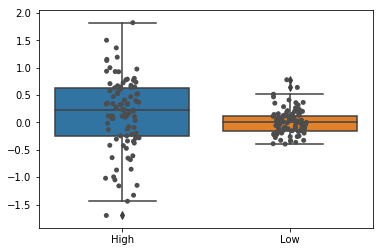

In [79]:
dist_df = pd.DataFrame(columns=['High','Low'])
dist_df['High'] = high_proteomics
dist_df['Low'] = pd.Series(low_proteomics)

plot_dist = sns.boxplot(data = dist_df)
pts_dist = sns.stripplot(data=dist_df, jitter=True, color='.3')

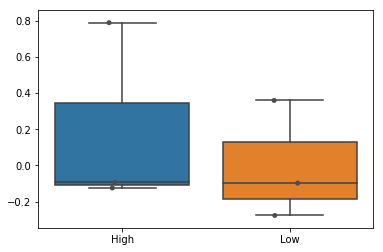

In [80]:
plot_df = pd.DataFrame(columns = ['High', 'Low'])
plot_df['High'] = three_high_measurements
plot_df['Low'] = three_low_measurements

plot = sns.boxplot(data=plot_df)
pts = sns.stripplot(data=plot_df, jitter=True, color='.3')

In [81]:
sd_high = np.std(three_high_measurements)
sd_low = np.std(three_low_measurements)

print("HIGH SD: ", sd_high)
print("LOW SD: ", sd_low)

HIGH SD:  0.4238130326767532
LOW SD:  0.2678326011190987


### Track SD for 3 randomly selected for high/low proteins over 1000 of each

In [87]:
high_sds = []
for high_prot in high_sd_proteins:
    high_proteomics = list(proteomics_data[high_prot].dropna())
    three_high_measurements = randomly_select_3(high_proteomics)
    high_sd = np.std(three_high_measurements)
    if not np.isnan(high_sd):
        high_sds.append(high_sd)

low_sds = []
for low_prot in low_sd_proteins:
    low_proteomics = list(proteomics_data[low_prot].dropna())
    three_low_measurements = randomly_select_3(low_proteomics)
    low_sd = np.std(three_low_measurements)
    if not np.isnan(low_sd):
        low_sds.append(low_sd)

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


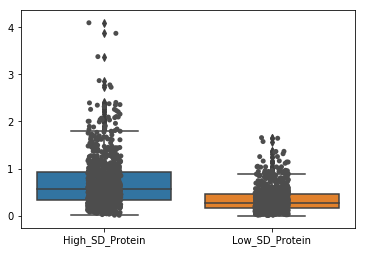

In [88]:
sd_plot_df = pd.DataFrame(columns=['High_SD_Protein', 'Low_SD_Protein'])
sd_plot_df['High_SD_Protein'] = pd.Series(high_sds)
sd_plot_df['Low_SD_Protein'] = pd.Series(low_sds)

plot = sns.boxplot(data=sd_plot_df)
pts = sns.stripplot(data=sd_plot_df, jitter=True, color='.3')

In [89]:
stat, pval = scipy.stats.ttest_ind(high_sds,low_sds)

print(pval)

3.326349310288126e-82
